### Examine the Data

RMSE for Tank_1: 348.7622513042802
RMSE for Tank_2: 535.3541847332148
RMSE for Tank_3: 388.23110766145305
RMSE for Pump_1: 0.3987345094903621
RMSE for Pump_2: 0.3015610122837566
RMSE for Flow_sensor: 1947.5595888931111


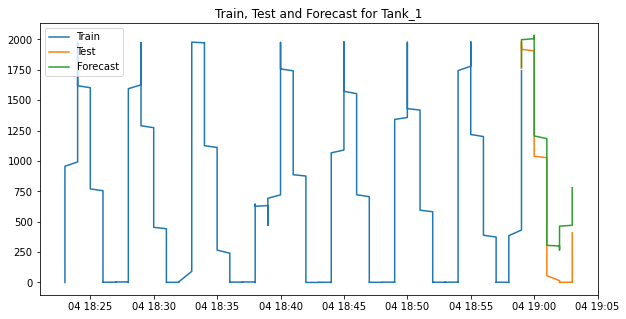

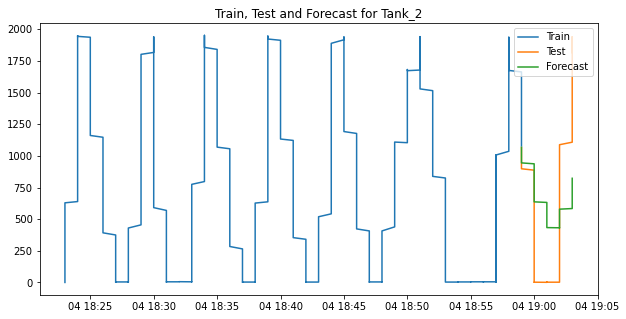

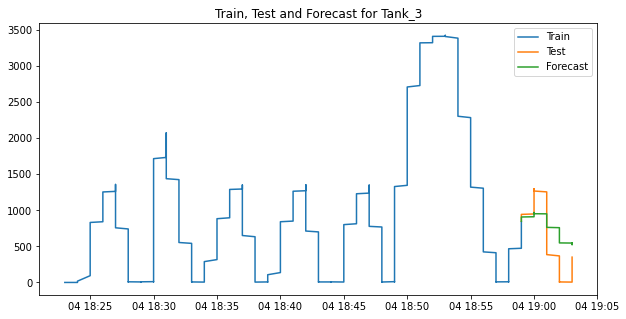

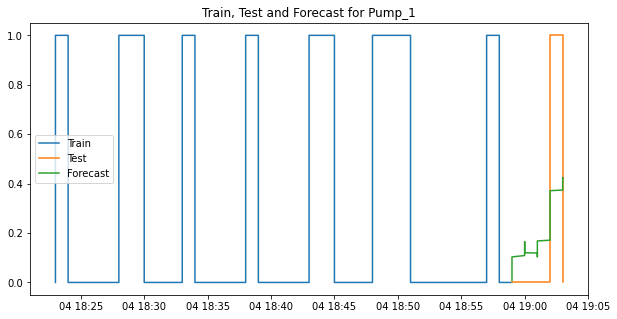

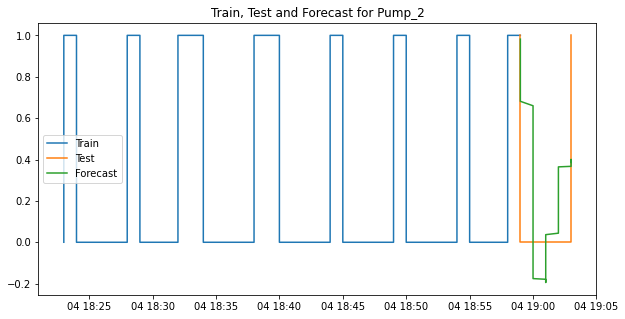

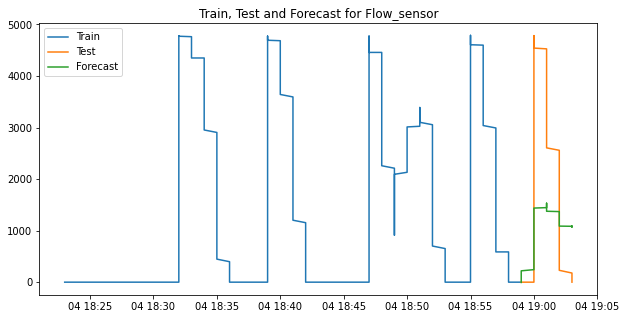

In [90]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load and preprocess data
file_name = 'phy_cps.csv'
# file_name = 'waterTank_Golden_reduced.csv'
data = pd.read_csv(file_name, index_col=0, parse_dates=True)
data = df.dropna()

# Split data into training and testing sets
train_size = int(len(df) * 0.9)
train, test = data.iloc[:train_size], data.iloc[train_size:]
# train, test = data[:train_size], data[train_size:]

# Fit the VAR model
model = VAR(train)
# model_fitted = model.fit(maxlags=15, ic='aic')
model_fitted = model.fit(maxlags=25, ic='aic')

# Make forecasts
lag_order = model_fitted.k_ar
forecast_input = train.values[-lag_order:]
forecast = model_fitted.forecast(y=forecast_input, steps=len(test))
forecast_df = pd.DataFrame(forecast, index=test.index, columns=test.columns)


# Evaluate forecasts
results = {}
for col in test.columns:
    rmse = np.sqrt(mean_squared_error(test[col], forecast_df[col]))
    results[col] = rmse
    print(f'RMSE for {col}: {rmse}')

# Plot results
for col in test.columns:
    plt.figure(figsize=(10, 5))
    # plt.plot(train.index, train[col], label='Train')
    # plt.plot(test.index, test.iloc[col], label='Test')
    # plt.plot(forecast_df.index, forecast_df.iloc[col], label='Forecast')
    plt.plot(train[col], label='Train')
    plt.plot(test[col], label='Test')
    plt.plot(forecast_df[col], label='Forecast')
    plt.title(f'Train, Test and Forecast for {col}')
    plt.legend()
    plt.show()


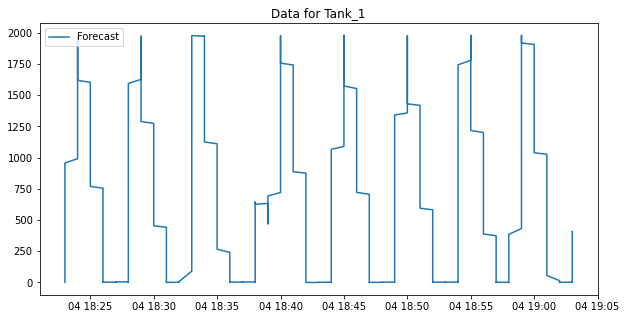

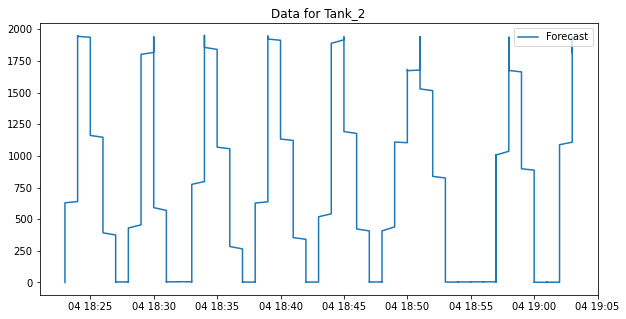

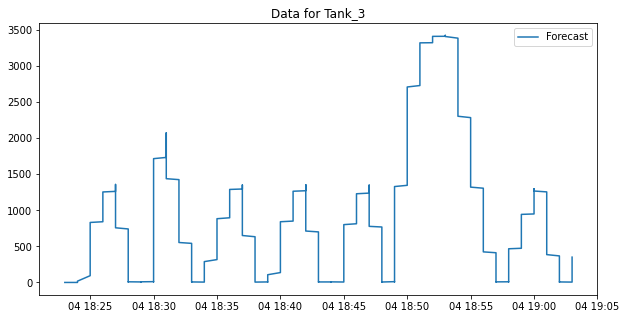

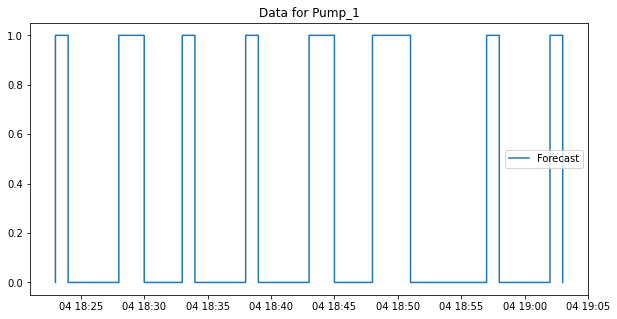

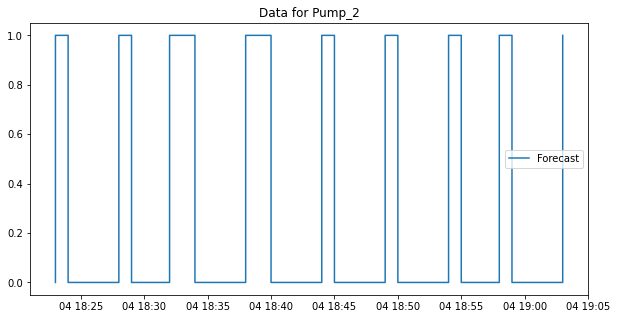

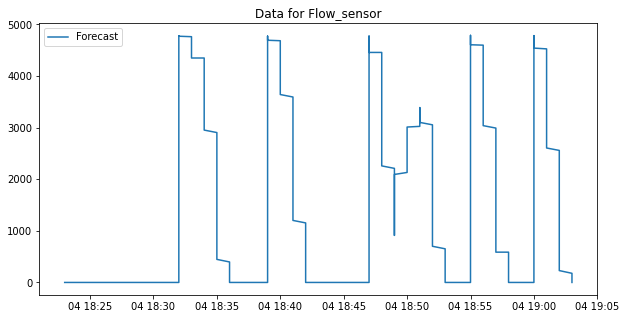

In [91]:
for col in data.columns:
    plt.figure(figsize=(10, 5))
    plt.plot(data[col], label='Forecast')
    plt.title(f'Data for {col}')
    plt.legend()
    plt.show()

In [74]:
train_size

2178